In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi

# %matplotlib widget
%matplotlib inline
pd.set_option('display.max_rows', None)

# Student1

In [9]:
df1a = pd.read_csv("datasets/Zeinab/Student1_8April.csv")
df1b = pd.read_csv("datasets/Zeinab/Student1_9April.csv")
df1c = pd.read_csv("datasets/Zeinab/Student1_12April.csv")
df1d = pd.read_csv("datasets/Zeinab/Student1_15April_1.csv")
df1e = pd.read_csv("datasets/Zeinab/Student1_15April_2.csv")
df1f = pd.read_csv("datasets/Zeinab/Student1_16April_1.csv")
df1g = pd.read_csv("datasets/Zeinab/Student1_16April_2.csv")

In [10]:
df1 = pd.concat([df1a,df1b,df1c,df1d,df1e,df1f,df1g], ignore_index=True).reset_index(drop=True)

In [11]:
df1.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,172.217.21.163,TCP,108,Unknown,-1,0x01072021,33190 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.010845,10.215.173.1,10.215.173.2,DNS,116,Google Play service,10180,0x01072021,Standard query 0x7ede A alt1-mtalk.google.com
2,3,0.028064,10.215.173.1,10.215.173.2,DNS,112,Google Play Store,10169,0x01072021,Standard query 0xd26b A www.googleapis.com
3,4,0.057823,10.215.173.1,47.241.21.126,TCP,108,Xiaomi service fram,10099,0x01072021,36772 > 5222 [SYN] Seq=0 Win=65535 Len=0 MSS...
4,5,0.001325,10.215.173.2,10.215.173.1,DNS,164,Google Play service,10180,0x01072021,Standard query response 0x7ede A alt1-mtalk.go...


In [12]:
len(df1)

1324133

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324133 entries, 0 to 1324132
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   No.          1324133 non-null  int64  
 1   Time         1324133 non-null  float64
 2   Source       1324133 non-null  object 
 3   Destination  1324133 non-null  object 
 4   Protocol     1324133 non-null  object 
 5   Length       1324133 non-null  int64  
 6   App name     1324133 non-null  object 
 7   UID          1324133 non-null  int64  
 8   Magic        1324133 non-null  object 
 9   Info         1324132 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 101.0+ MB


In [14]:
df1.describe()

,No.,Time,Length,UID
count,1.324133e+06,1.324133e+06,1.324133e+06,1.324133e+06
mean,1.162829e+05,4.307784e-02,2.088531e+03,2.429085e+04
std,8.010496e+04,4.437823e+00,2.703602e+03,1.187106e+06
min,1.000000e+00,0.000000e+00,8.800000e+01,-1.000000e+00
25%,4.729100e+04,2.530000e-04,8.800000e+01,1.014700e+04
50%,1.049940e+05,5.840000e-04,7.600000e+02,1.025000e+04
75%,1.782030e+05,2.720000e-03,2.824000e+03,1.025000e+04
max,3.201680e+05,3.349691e+03,1.004800e+04,9.991009e+07


In [15]:
df1 = df1.dropna()
df1.isnull().values.any()

False

In [16]:
df1['App name'].unique()

array(['Unknown', 'Google Play service', 'Google Play Store',
       'Xiaomi service fram', 'Telegram', 'Analytics', 'YouTube',
       'BolBol Jan', 'MX Player', 'Phone', 'Bale', 'msa', 'Weather',
       'Android', 'PDF Creator', 'Instagram', 'Basalam',
       'Facebook Services', 'Chrome', 'WhatsApp', 'Find device', 'Eitaa',
       'MyIrancell', 'Google', 'Abadis Dic', 'Divar', 'Snapp',
       'Facebook App Manage', 'Notes', 'Messages', 'TAPSI', 'Maps',
       'Updater', 'SHAREit', 'Contacts',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Snapchat', 'File Manager', 'GPS', 'Rubika', 'Connect',
       'WPS Office', 'Fastdic', 'Cleaner', 'Gboard', 'Wallpaper Carousel'],
      dtype=object)

In [17]:
len(df1['App name'].unique())

46

In [18]:
for i, row in df1.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df1.at[i, 'App name'] = 'X'

In [19]:
df1['Time'] = df1['Time']/60

In [20]:
app_time_agg1 = df1.groupby(['App name']).agg({'Time':sum}).sort_values(by=['Time'], ascending=False)
app_time_agg1.head()

,Time
App name,
WhatsApp,138.140126
Google Play service,132.391923
Google Play Store,126.335077
Telegram,116.301839
Facebook Services,111.386014


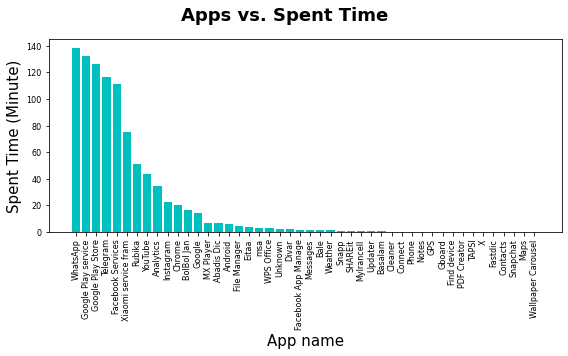

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg1.index, app_time_agg1['Time'], color='c')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)
# ax.set_yscale('log')

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [22]:
# df.groupby(['App name']).sum().filter(items=['Time']).sort_values(by=['Time'], ascending=False)

# Student 2

In [23]:
df2a = pd.read_csv("datasets/Zeinab/Student2_8April.csv")
df2b = pd.read_csv("datasets/Zeinab/Student2_10April.csv")
df2c = pd.read_csv("datasets/Zeinab/Student2_11April.csv")
df2d = pd.read_csv("datasets/Zeinab/Student2_12April.csv")
df2e = pd.read_csv("datasets/Zeinab/Student2_13April.csv")
df2f = pd.read_csv("datasets/Zeinab/Student2_16April.csv")

In [24]:
df2 = pd.concat([df2a,df2b,df2c,df2d,df2e,df2f], ignore_index=True).reset_index(drop=True)

In [25]:
df2.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.255.255.254,DNS,116,Unknown,-1,0x01072021,Standard query 0x5fab A youtubei.googleapis.com
1,2,0.012261,10.215.173.1,10.10.34.35,UDP,1324,YouTube,10253,0x01072021,59248 > 443 Len=1250
2,3,0.010985,10.215.173.1,10.215.173.2,DNS,116,YouTube,10253,0x01072021,Standard query 0xca16 A youtubei.googleapis.com
3,4,0.015547,10.215.173.1,10.10.34.35,TCP,108,YouTube,10253,0x01072021,43766 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
4,5,0.005912,10.215.173.1,10.10.34.35,TCP,108,YouTube,10253,0x01072021,43768 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...


In [26]:
len(df2)

160013

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160013 entries, 0 to 160012
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          160013 non-null  int64  
 1   Time         160013 non-null  float64
 2   Source       160013 non-null  object 
 3   Destination  160013 non-null  object 
 4   Protocol     160013 non-null  object 
 5   Length       160013 non-null  int64  
 6   App name     160013 non-null  object 
 7   UID          160013 non-null  int64  
 8   Magic        160013 non-null  object 
 9   Info         160010 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 12.2+ MB


In [28]:
df2.describe()

,No.,Time,Length,UID
count,160013.000000,160013.000000,160013.000000,160013.000000
mean,32179.159018,0.277994,529.362364,10231.372289
std,29948.729440,4.680207,1335.638175,656.181129
min,1.000000,0.000000,88.000000,-1.000000
25%,6668.000000,0.000495,88.000000,10293.000000
50%,17561.000000,0.001877,96.000000,10293.000000
75%,57058.000000,0.022421,292.000000,10293.000000
max,97061.000000,273.763254,10048.000000,10502.000000


In [29]:
df2 = df2.dropna()
df2.isnull().values.any()

False

In [30]:
df2['App name'].unique()

array(['Unknown', 'YouTube', 'Meta Services', 'SHAREit',
       'Google Play service', 'netd', 'Instagram', 'Telegram',
       'Google Play Store', 'Twitter', 'Meta App Manager',
       'Game Launcher', 'Facebook', 'Chrome', 'Snapchat', 'Likee',
       'Android',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Messages', 'Digikala', 'Samsung Keyboard', 'Office', 'Google',
       'Link to Windows', 'Galaxy Store', 'GPS', 'Gmail', 'Snapp',
       'Pinterest', 'Game Optimizing Ser', 'Quick Share', 'Weather',
       'Camera', 'Customization Servi', 'Samsung Cloud', 'MiniFox VPN',
       'Gallery', 'Bazaar', 'Picsart', 'Impo', 'Android System WebV',
       'Edge panels'], dtype=object)

In [31]:
len(df2['App name'].unique())

42

In [32]:
for i, row in df2.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df2.at[i, 'App name'] = 'X' 

In [33]:
df2['Time'] = df2['Time']/60

In [34]:
app_time_agg2 = df2.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg2.head()

,Time
App name,
Google Play service,236.939776
Telegram,199.777197
Meta Services,101.044323
Google Play Store,72.224071
Instagram,48.563672


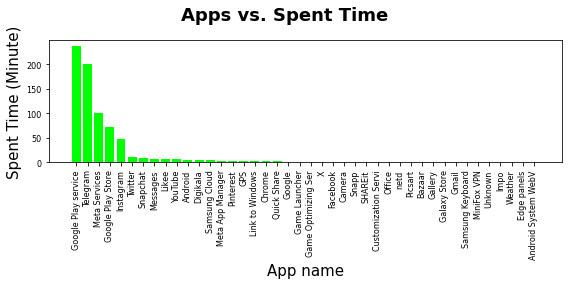

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg2.index, app_time_agg2['Time'], color='lime')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)
# ax.set_yscale('log')

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 3

In [36]:
df3a = pd.read_csv("datasets/Zeinab/Student3_8April_1.csv")
df3b = pd.read_csv("datasets/Zeinab/Student3_8April_2.csv")
df3c = pd.read_csv("datasets/Zeinab/Student3_8April_3.csv")
df3d = pd.read_csv("datasets/Zeinab/Student3_9April_1.csv")
df3e = pd.read_csv("datasets/Zeinab/Student3_9April_2.csv")
df3f = pd.read_csv("datasets/Zeinab/Student3_10April_1.csv")
df3g = pd.read_csv("datasets/Zeinab/Student3_10April_2.csv")
df3h = pd.read_csv("datasets/Zeinab/Student3_10April_3.csv")
df3i = pd.read_csv("datasets/Zeinab/Student3_10April_4.csv")
df3j = pd.read_csv("datasets/Zeinab/Student3_11April_1.csv")
df3k = pd.read_csv("datasets/Zeinab/Student3_11April_2.csv")
df3l = pd.read_csv("datasets/Zeinab/Student3_12April_1.csv")
df3m = pd.read_csv("datasets/Zeinab/Student3_12April_2.csv")
df3n = pd.read_csv("datasets/Zeinab/Student3_12April_3.csv")
df3o = pd.read_csv("datasets/Zeinab/Student3_13April.csv")
df3p = pd.read_csv("datasets/Zeinab/Student3_14April.csv")
df3q = pd.read_csv("datasets/Zeinab/Student3_15April_1.csv")
df3r = pd.read_csv("datasets/Zeinab/Student3_15April_2.csv")
df3s = pd.read_csv("datasets/Zeinab/Student3_15April_3.csv")

In [37]:
df3 = pd.concat([df3a,df3b,df3c,df3d,df3e,df3f,df3g,df3h,df3i,
                 df3j,df3k,df3l,df3m,df3n,df3o,df3p,df3q,df3r,df3s], 
                ignore_index=True).reset_index(drop=True)

In [38]:
df3.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,124,Google Play service,10093,0x01072021,Standard query 0xa712 A infinitedata-pa.google...
1,2,0.016185,10.215.173.1,10.215.173.2,DNS,120,Google Play service,10093,0x01072021,Standard query 0xb75b A playatoms-pa.googleapi...
2,3,0.018226,10.215.173.1,10.215.173.2,DNS,120,Google Play service,10093,0x01072021,Standard query 0x8dae A voilatile-pa.googleapi...
3,4,0.074173,10.215.173.1,10.215.173.2,DNS,108,SHAREit Lite,10229,0x01072021,Standard query 0xe816 A dt.beyla.site
4,5,0.092955,192.168.1.102,10.10.34.34,UDP,1324,Google Play Store,10103,0x01072021,36413 > 443 Len=1250


In [39]:
len(df3)

1620038

In [40]:
df3 = df3.dropna()
df3.isnull().values.any()

False

In [41]:
df3['App name'].unique()

array(['Google Play service', 'SHAREit Lite', 'Google Play Store',
       'Eitaa', 'Unknown', 'Telegram', 'Facebook Services',
       'Workout for Women', 'Instagram', 'Group Sharing', 'OneDrive',
       'Quick Share', 'Galaxy Store', 'Samsung Cloud', 'Gmail',
       'Google Calendar Syn', 'Android', 'Google', 'Translate', 'GPS',
       'Facebook App Manage', 'Samsung account', 'MX Player',
       'SmartThings', 'Music Player', 'Gallery', 'SCPM Client', 'Chrome',
       'My Files', 'YouTube', 'Snapchat', 'Pinterest',
       'Customization Servi', 'ADM', 'English 6mins', 'PDB', 'Phone',
       'Game Optimizing Ser', 'Cake', 'NetworkDiagnostic',
       'MDE Service Framewo', 'Samsung Keyboard', 'Weather',
       'Galaxy Themes', 'Swing VPN', 'Messages', 'Root', 'Link Sharing',
       'MyIrancell', 'Divar', 'Samsung Push Servic', 'Time Zone Updater',
       '\\357\\277\\275\\357\\277\\275Great Cleaner', 'Maps'],
      dtype=object)

In [42]:
len(df3['App name'].unique())

54

In [43]:
for i, row in df3.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275Great Cleaner':
        df3.at[i, 'App name'] = 'Great Cleaner'

In [44]:
df3['Time'] = df3['Time']/60

In [45]:
app_time_agg3 = df3.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg3.head()

,Time
App name,
Instagram,1392.318509
GPS,928.771925
Android,674.570962
Google Play service,673.119345
Telegram,505.121538


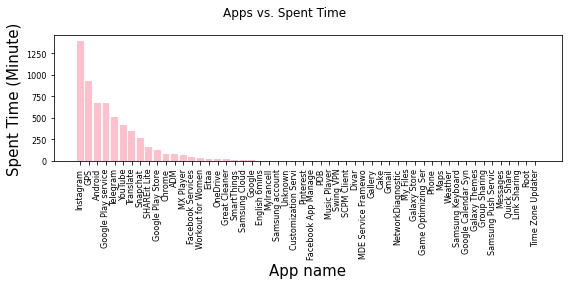

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
fig.suptitle("Apps vs. Spent Time")

ax.bar(app_time_agg3.index, app_time_agg3['Time'], color='pink')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)
# ax.set_yscale('log')

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 4

In [47]:
df4a = pd.read_csv("datasets/Zeinab/Student4_8April.csv")
df4b = pd.read_csv("datasets/Zeinab/Student4_9April.csv")
df4c = pd.read_csv("datasets/Zeinab/Student4_10April.csv")
df4d = pd.read_csv("datasets/Zeinab/Student4_11April.csv")
df4e = pd.read_csv("datasets/Zeinab/Student4_12April.csv")
df4f = pd.read_csv("datasets/Zeinab/Student4_13April.csv")
df4g = pd.read_csv("datasets/Zeinab/Student4_14April.csv")
df4h = pd.read_csv("datasets/Zeinab/Student4_15April.csv")

In [48]:
df4 = pd.concat([df4a,df4b,df4c,df4d,df4e,df4f,df4g,df4h], ignore_index=True).reset_index(drop=True)

In [49]:
df4.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.10.34.34,UDP,1324,\357\277\275\357\277\275\357\277\275\357\277\2...,10225,0x01072021,44149 > 443 Len=1250
1,2,0.018629,10.215.173.1,10.10.34.34,TCP,108,\357\277\275\357\277\275\357\277\275\357\277\2...,10225,0x01072021,45306 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
2,3,0.063157,10.215.173.1,10.215.173.2,DNS,116,Meta Services,10082,0x01072021,Standard query 0xe65d A mqtt-mini.facebook.com
3,4,0.017891,10.215.173.1,10.215.173.2,DNS,112,Meta Services,10082,0x01072021,Standard query 0x4cc5 A graph.facebook.com
4,5,0.027000,10.215.173.2,10.215.173.1,DNS,116,Meta Services,10082,0x01072021,Standard query response 0xe65d Server failure ...


In [50]:
len(df4)

2946706

In [51]:
df4 = df4.dropna()
df4.isnull().values.any()

False

In [52]:
df4['App name'].unique()

array(['\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 Goog',
       'Meta Services', 'Instagram',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'netd', 'Telegram',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 Googl',
       'Unknown', 'VPN SHIELD', 'SHAREit',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Chrome',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275Google\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       '\

In [53]:
len(df4['App name'].unique())

60

In [54]:
for i, row in df4.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 Goog':
        df4.at[i, 'App name'] = 'Google'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'X'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 Googl':
        df4.at[i, 'App name'] = 'Google'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'XX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275Google\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'Google'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'XXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'XXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'XXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275':
        df4.at[i, 'App name'] = 'XXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'XXXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'XXXXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df4.at[i, 'App name'] = 'XXXXXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275':
        df4.at[i, 'App name'] = 'XXXXXXXXX'

In [55]:
df4['Time'] = df4['Time']/60

In [56]:
app_time_agg4 = df4.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg4.head()

,Time
App name,
Google,1774.252360
netd,943.454256
Telegram,735.257659
MobileWips,232.301109
Android,194.604934


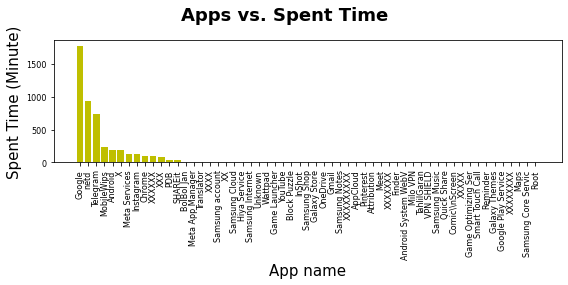

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg4.index, app_time_agg4['Time'], color='y')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 5

In [58]:
df5a = pd.read_csv("datasets/Zeinab/Student5_8April.csv")
df5b = pd.read_csv("datasets/Zeinab/Student5_9April.csv")
df5c = pd.read_csv("datasets/Zeinab/Student5_10April.csv")
df5d = pd.read_csv("datasets/Zeinab/Student5_11April.csv")
df5e = pd.read_csv("datasets/Zeinab/Student5_12April.csv")
df5f = pd.read_csv("datasets/Zeinab/Student5_13April.csv")
df5g = pd.read_csv("datasets/Zeinab/Student5_14April.csv")
df5h = pd.read_csv("datasets/Zeinab/Student5_15April.csv")

In [59]:
df5 = pd.concat([df5a,df5b,df5c,df5d,df5e,df5f,df5g,df5h], ignore_index=True).reset_index(drop=True)

In [60]:
df5.head()

,No.,Time,Destination,Protocol,Length,App name,UID,Magic,Info,Source
0,1,0.000000,8.219.215.190,TCP,108,Android,1000,0x01072021,41520 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...,NaN
1,2,0.003457,8.219.222.3,TCP,108,Android,1000,0x01072021,46882 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...,NaN
2,3,0.002523,8.219.215.190,TCP,108,Android,1000,0x01072021,38612 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...,NaN
3,4,0.013738,8.219.215.190,TCP,108,msa,10119,0x01072021,38614 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...,NaN
4,5,0.017220,47.241.218.212,TCP,108,Xiaomi service fram,10084,0x01072021,48778 > 5222 [SYN] Seq=0 Win=65535 Len=0 MSS...,NaN


In [61]:
len(df5)

138150

In [62]:
df5 = df5.dropna()
df5.isnull().values.any()

False

In [63]:
df5['App name'].unique()

array(['Xiaomi service fram', 'Google Backup Trans', 'netd',
       'Facebook Services', 'Google Play Store', 'Android', 'LDOAE5',
       'TahlilGaran', 'WhatsApp', 'Instagram', 'msa', 'Browser',
       'Mi Account', 'Weather', 'Analytics', 'Google',
       'Facebook App Manage', 'YouTube', 'Pinterest', 'Telegram', 'Maps',
       'GPS', 'Find device', 'Phone',
       'Cloud backup\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Bestgram', 'Meet', 'Pedometer Step Coun', 'Unknown', 'Impo',
       'Updater', 'Gboard', 'Chrome', 'Messages', 'Gmail'], dtype=object)

In [64]:
len(df5['App name'].unique())

35

In [65]:
for i, row in df5.iterrows():
    if row['App name']=='Cloud backup\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df5.at[i, 'App name'] = 'Cloud backup'

In [66]:
df5['Time'] = df5['Time']/60

In [67]:
app_time_agg5 = df5.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg5.head()

,Time
App name,
Cloud backup,213.156614
WhatsApp,157.908261
Instagram,144.618807
Telegram,116.993365
YouTube,110.285492


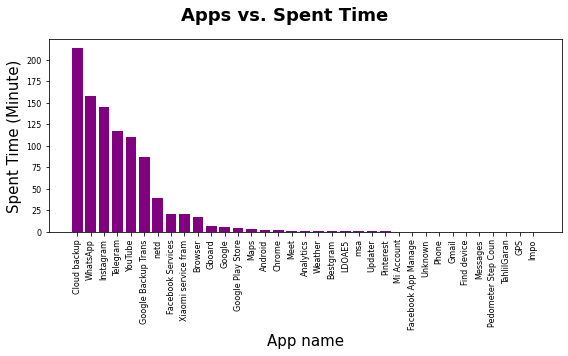

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg5.index, app_time_agg5['Time'], color='purple')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 6

In [69]:
df6a = pd.read_csv("datasets/Zeinab/Student6_8April.csv")
df6b = pd.read_csv("datasets/Zeinab/Student6_9April.csv")
df6c = pd.read_csv("datasets/Zeinab/Student6_10April.csv")
df6d = pd.read_csv("datasets/Zeinab/Student6_11April_1.csv")
df6e = pd.read_csv("datasets/Zeinab/Student6_11April_2.csv")
df6f = pd.read_csv("datasets/Zeinab/Student6_12April.csv")
df6g = pd.read_csv("datasets/Zeinab/Student6_13April.csv")
df6h = pd.read_csv("datasets/Zeinab/Student6_14April.csv")
df6i = pd.read_csv("datasets/Zeinab/Student6_15April.csv")

In [70]:
df6 = pd.concat([df6a,df6b,df6c,df6d,df6e,df6f,df6g,df6h,df6i], ignore_index=True).reset_index(drop=True)

In [71]:
df6.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,73,NaN,NaN,NaN,Standard query 0x7554 A playatoms-pa.googleapi...
1,2,0.006259,10.215.173.2,10.215.173.1,DNS,169,NaN,NaN,NaN,Standard query response 0x7554 A playatoms-pa....
2,3,0.009793,10.215.173.1,35.190.43.134,TCP,60,NaN,NaN,NaN,45204 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
3,4,0.048535,10.215.173.1,10.215.173.2,DNS,64,NaN,NaN,NaN,Standard query 0x26f6 A graph.facebook.com
4,5,0.006863,10.215.173.2,10.215.173.1,DNS,80,NaN,NaN,NaN,Standard query response 0x26f6 A graph.faceboo...


In [72]:
len(df6)

963372

In [73]:
df6 = df6.dropna()
df6.isnull().values.any()

False

In [74]:
df6['App name'].unique()

array(['Musixmatch', 'Meta Services', 'Snapchat', 'Unknown', 'YouTube',
       'Google Play service', 'Telegram', 'Plus', 'Email',
       'Google Play Store', 'Wearfit Pro', 'Nearby Service', 'Google',
       'Samsung Cloud', 'Instagram', 'Android', 'Pinterest', 'Wattpad',
       'Customisation Servi', 'ADM', 'Game Launcher', 'Spotify',
       'Quick Share', 'Chrome', 'Fonts', 'Translate', 'Edge panels',
       'Photos', 'Weather', 'Galaxy Store', 'Samsung account',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Samsung Music', 'Meta App Manager', 'LDOAE5', 'TahlilGaran',
       'Gallery', 'VPN Like', 'MTP Host', 'Group Sharing',
       'Galaxy Themes', 'ReadEra', 'Leitner', 'Archive Reader', 'AdaVPN',
       'Meet', 'Messages', 'Camera', 'NetworkDiagnostic',
       'Game Opti

In [75]:
len(df6['App name'].unique())

63

In [76]:
for i, row in df6.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df6.at[i, 'App name'] = 'X'

In [77]:
df6['Time'] = df6['Time']/60

In [78]:
app_time_agg6 = df6.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg6.head()

,Time
App name,
Telegram,256.509320
Wearfit Pro,198.600395
Google Play service,178.755020
Google Play Store,117.721172
Plus,74.721129


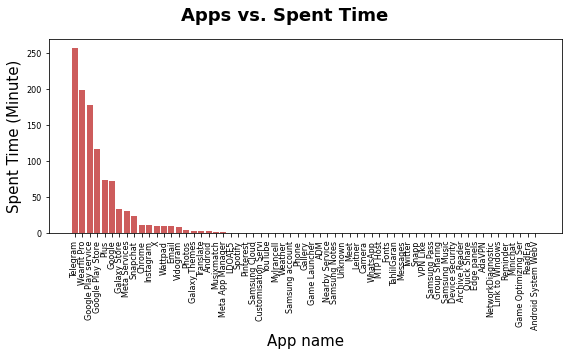

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg6.index, app_time_agg6['Time'], color='indianred')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 7

In [80]:
df7a = pd.read_csv("datasets/Zeinab/Student7_8April_1.csv")
df7b = pd.read_csv("datasets/Zeinab/Student7_8April_2.csv")
df7c = pd.read_csv("datasets/Zeinab/Student7_8April_3.csv")
df7d = pd.read_csv("datasets/Zeinab/Student7_8April_4.csv")
df7e = pd.read_csv("datasets/Zeinab/Student7_8April_5.csv")
df7f = pd.read_csv("datasets/Zeinab/Student7_9April_1.csv")
df7g = pd.read_csv("datasets/Zeinab/Student7_9April_2.csv")
df7h = pd.read_csv("datasets/Zeinab/Student7_10April.csv")
df7i = pd.read_csv("datasets/Zeinab/Student7_11April.csv")
df7j = pd.read_csv("datasets/Zeinab/Student7_12April.csv")
df7k = pd.read_csv("datasets/Zeinab/Student7_13April.csv")
df7l = pd.read_csv("datasets/Zeinab/Student7_14April.csv")
df7m = pd.read_csv("datasets/Zeinab/Student7_15April.csv")

In [81]:
df7 = pd.concat([df7a,df7b,df7c,df7d,df7e,df7f,df7g,df7h,
                 df7i,df7j,df7k,df7l,df7m], ignore_index=True).reset_index(drop=True)
df7.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,TCP,108,netd,1051,0x01072021,57044 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.148494,10.215.173.1,10.215.173.2,DNS,108,Eitaa,10006,0x01072021,Standard query 0x65bb A hasan.eitaa.ir
2,3,0.033726,10.215.173.2,10.215.173.1,DNS,124,Eitaa,10006,0x01072021,Standard query response 0x65bb A hasan.eitaa.i...
3,4,0.010146,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0xe6c6 A 0.pool.ntp.org
4,5,0.011375,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0x6b52 A 2.pool.ntp.org


In [82]:
len(df7)

1249668

In [83]:
df7 = df7.dropna()
df7.isnull().values.any()

False

In [84]:
df7['App name'].unique()

array(['netd', 'Eitaa', 'GPS', 'Unknown', 'YouTube', 'Google Play Store',
       'Snapchat', 'Telegram', 'Google', 'Swing VPN',
       'Google Play service', 'OneDrive', 'Android',
       'Google Calendar Syn', 'Samsung Cloud', 'Configuration updat',
       'Snapp', 'TahlilGaran', 'Soroush+', 'Live Transcribe & S',
       'Twitter', 'Music player', 'LDOAE5', 'Samsung Internet',
       'Android System WebV', 'Pinterest', 'Samsung account', 'Camera',
       'Customization Servi',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       '100 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\

In [85]:
len(df7['App name'].unique())

52

In [86]:
for i, row in df7.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df7.at[i, 'App name'] = 'X'
    elif row['App name']=='100 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df7.at[i, 'App name'] = 'XX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df7.at[i, 'App name'] = 'XXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df7.at[i, 'App name'] = 'XXXX'

In [87]:
df7['Time'] = df7['Time']/60

In [88]:
app_time_agg7 = df7.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg7.head()

,Time
App name,
YouTube,1062.049546
Google Play service,470.479864
Telegram,465.838018
netd,461.156495
Google Play Store,345.845601


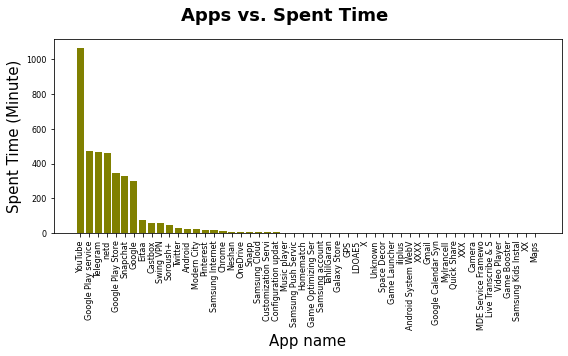

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg7.index, app_time_agg7['Time'], color= 'olive')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 8

In [90]:
df8a = pd.read_csv("datasets/Zeinab/Student8_9April.csv")
df8b = pd.read_csv("datasets/Zeinab/Student8_10April_1.csv")
df8c = pd.read_csv("datasets/Zeinab/Student8_10April_2.csv")
df8d = pd.read_csv("datasets/Zeinab/Student8_10April_3.csv")
df8e = pd.read_csv("datasets/Zeinab/Student8_10April_4.csv")
df8f = pd.read_csv("datasets/Zeinab/Student8_10April_5.csv")
df8g = pd.read_csv("datasets/Zeinab/Student8_10April_6.csv")
df8h = pd.read_csv("datasets/Zeinab/Student8_11April.csv")
df8i = pd.read_csv("datasets/Zeinab/Student8_12April_1.csv")
df8j = pd.read_csv("datasets/Zeinab/Student8_12April_2.csv")
df8k = pd.read_csv("datasets/Zeinab/Student8_12April_3.csv")
df8l = pd.read_csv("datasets/Zeinab/Student8_13April_1.csv")
df8m = pd.read_csv("datasets/Zeinab/Student8_13April_2.csv")
df8n = pd.read_csv("datasets/Zeinab/Student8_13April_3.csv")
df8o = pd.read_csv("datasets/Zeinab/Student8_13April_4.csv")
df8p = pd.read_csv("datasets/Zeinab/Student8_13April_5.csv")
df8q = pd.read_csv("datasets/Zeinab/Student8_13April_6.csv")
df8r = pd.read_csv("datasets/Zeinab/Student8_14April.csv")
df8s = pd.read_csv("datasets/Zeinab/Student8_15April_1.csv")
df8t = pd.read_csv("datasets/Zeinab/Student8_15April_2.csv")
df8u = pd.read_csv("datasets/Zeinab/Student8_15April_3.csv")
df8v = pd.read_csv("datasets/Zeinab/Student8_15April_4.csv")
df8w = pd.read_csv("datasets/Zeinab/Student8_15April_5.csv")
df8x = pd.read_csv("datasets/Zeinab/Student8_15April_6.csv")
df8y = pd.read_csv("datasets/Zeinab/Student8_15April_7.csv")

In [91]:
df8 = pd.concat([df8a,df8b,df8c,df8d,df8e,df8f,df8g,df8h,df8i,df8j,df8k,df8l,df8m,df8n,
                 df8o,df8p,df8q,df8r,df8s,df8t,df8u,df8v,df8w,df8x,df8y], 
                ignore_index=True).reset_index(drop=True)
df8.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.10.34.35,TCP,108,Instagram,10181,0x01072021,38644 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.007024,10.215.173.1,10.215.173.2,DNS,116,Instagram,10181,0x01072021,Standard query 0xdf6c A edge-mqtt.facebook.com
2,3,0.011156,10.215.173.1,10.131.26.138,TCP,108,Google Play Store,10042,0x01072021,46488 > 8080 [SYN] Seq=0 Win=65535 Len=0 MSS...
3,4,0.038216,10.215.173.1,10.215.173.2,DNS,120,Xiaomi service fram,10161,0x01072021,Standard query 0x5c8d A app.chat.global.xiaomi...
4,5,0.001362,10.215.173.2,10.215.173.1,DNS,132,Instagram,10181,0x01072021,Standard query response 0xdf6c A edge-mqtt.fac...


In [92]:
len(df8)

379533

In [93]:
df8 = df8.dropna()
df8.isnull().values.any()

False

In [94]:
df8['App name'].unique()

array(['Instagram', 'Google Play Store', 'Xiaomi service fram', 'YouTube',
       'Google Play service', 'Meta Services', 'Analytics', 'Telegram',
       'Unknown', 'Facebook App Manage', 'System apps updater', 'Android',
       'Xiaomi Account', 'Weather', 'Eitaa', 'WhatsApp', 'msa',
       'Mi Video', 'Messages', 'Google', 'Phone', 'MulticastDNSRespond',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Nanogram', 'Cute Cat Launcher', 'Xiaomi Cloud', 'MTP Host',
       'Soroush+', 'Glitter Bunny', 'Chrome', 'Updater', 'b-amooz',
       'File Manager', 'WPS Office', 'Bazaar',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\3

In [95]:
len(df8['App name'].unique())

50

In [96]:
for i, row in df8.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df8.at[i, 'App name'] = 'X'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df8.at[i, 'App name'] = 'XX'

In [97]:
df8['Time'] = df8['Time']/60

In [98]:
app_time_agg8 = df8.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg8.head()

,Time
App name,
Telegram,105.903054
Chrome,98.559598
Google Play service,86.820093
Meta Services,68.748651
YouTube,67.284874


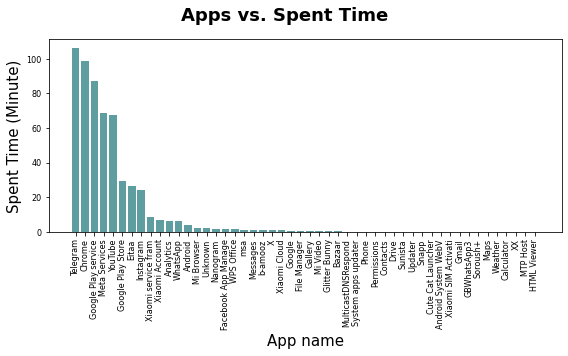

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg8.index, app_time_agg8['Time'], color='cadetblue')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 9

In [100]:
df9a = pd.read_csv("datasets/Zeinab/Student9_7April_1.csv")
df9b = pd.read_csv("datasets/Zeinab/Student9_7April_2.csv")
df9c = pd.read_csv("datasets/Zeinab/Student9_7April_3.csv")
df9d = pd.read_csv("datasets/Zeinab/Student9_8April_1.csv")
df9e = pd.read_csv("datasets/Zeinab/Student9_8April_2.csv")
df9f = pd.read_csv("datasets/Zeinab/Student9_8April_3.csv")
df9g = pd.read_csv("datasets/Zeinab/Student9_11April.csv")
df9h = pd.read_csv("datasets/Zeinab/Student9_12April.csv")
df9i = pd.read_csv("datasets/Zeinab/Student9_15April.csv")

In [101]:
df9 = pd.concat([df9a,df9b,df9c,df9d,df9e,df9f,df9g,df9h,df9i], ignore_index=True).reset_index(drop=True)
df9.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,116,Meta Services,10028,0x01072021,Standard query 0x02ff A mqtt-mini.facebook.com
1,2,0.009306,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0x8487 A 0.pool.ntp.org
2,3,0.005095,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0x833f A 1.pool.ntp.org
3,4,0.005448,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0x3aa5 A 2.pool.ntp.org
4,5,0.004994,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0x3ae0 A 3.pool.ntp.org


In [102]:
len(df9)

405356

In [103]:
df9 = df9.dropna()
df9.isnull().values.any()

False

In [104]:
df9['App name'].unique()

array(['Meta Services', 'GPS', 'netd', 'Telegram', 'Google Play service',
       'Google Play Store', 'Instagram', 'Unknown', 'Samsung Internet',
       'Weather', 'Android', 'Google', 'Facebook', 'Duolingo',
       'Customisation Servi', 'Samsung Cloud', 'WhatsApp',
       'Samsung account', 'Digikala', 'Android System WebV', 'Gmail',
       'MiniFox VPN', 'Meta App Manager', 'Samsung Notes', 'Galaxy Store',
       'Quick Share',
       'TAPSI - \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'SamsungPositioning', 'Pinterest', 'YouTube', 'Game Launcher',
       'Group Sharing', 'YouMe Calendar', 'Adobe Connect', 'Radio',
       'Translate', 'Samsung Pass', 'Docs', 'AdBlock for Samsung', 'Maps',
       'Cut the Rope 2', 'Reminder', 'Google Calendar Syn', 'Edge panels'],
      dtype=object)

In [105]:
len(df9['App name'].unique())

44

In [106]:
for i, row in df9.iterrows():
    if row['App name']=='TAPSI - \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df9.at[i, 'App name'] = 'TAPSI'

In [107]:
df9['Time'] = df9['Time']/60

In [108]:
app_time_agg9 = df9.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg9.head()

,Time
App name,
Instagram,293.643935
Telegram,204.754805
Google Play service,163.687287
Meta Services,108.430711
Google Play Store,52.446598


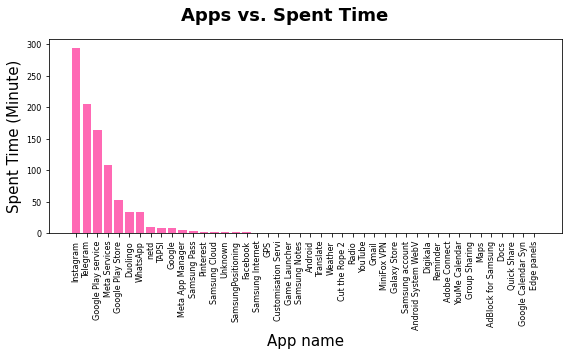

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Apps vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg9.index, app_time_agg9['Time'], color='hotpink')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 10

In [110]:
df10a = pd.read_csv("datasets/Zeinab/Student10_10April.csv")
df10b = pd.read_csv("datasets/Zeinab/Student10_11April.csv")
df10c = pd.read_csv("datasets/Zeinab/Student10_12April.csv", encoding='cp1252')
df10d = pd.read_csv("datasets/Zeinab/Student10_14April_1.csv", encoding='cp1252')
df10e = pd.read_csv("datasets/Zeinab/Student10_14April_2.csv")
df10f = pd.read_csv("datasets/Zeinab/Student10_15April.csv")
df10g = pd.read_csv("datasets/Zeinab/Student10_16April.csv")
df10h = pd.read_csv("datasets/Zeinab/Student10_17April.csv")

In [111]:
df10 = pd.concat([df10a,df10b,df10c,df10d,df10e,df10f,df10g,df10h], 
                 ignore_index=True).reset_index(drop=True)
df10.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,TCP,108,netd,1051,0x01072021,50690 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.011218,10.215.173.2,10.215.173.1,TCP,88,netd,1051,0x01072021,"853 > 50690 [RST, ACK] Seq=1 Ack=3796553373 ..."
2,3,0.996601,10.215.173.1,10.215.173.2,TCP,108,netd,1051,0x01072021,[TCP Retransmission] 50690 > 853 [SYN] Seq=0...
3,4,0.007596,10.215.173.2,10.215.173.1,TCP,88,netd,1051,0x01072021,"853 > 50690 [RST, ACK] Seq=1 Ack=3796553373 ..."
4,5,2.009073,10.215.173.1,10.215.173.2,TCP,108,netd,1051,0x01072021,[TCP Retransmission] 50690 > 853 [SYN] Seq=0...


In [112]:
len(df10)

442383

In [113]:
df10 = df10.dropna()
df10.isnull().values.any()

False

In [114]:
len(df10['App name'].unique())

71

In [115]:
for i, row in df10.iterrows():
    if row['App name']=='TAPSI - \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df10.at[i, 'App name'] = 'TAPSI'

In [116]:
df10['Time'] = df10['Time']/60

In [117]:
app_time_agg10 = df10.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg10.head()

,Time
App name,
Instagram,1670.096693
Google,1397.436222
Google Play service,1057.259928
Snapchat,784.790155
Meta Services,324.816970


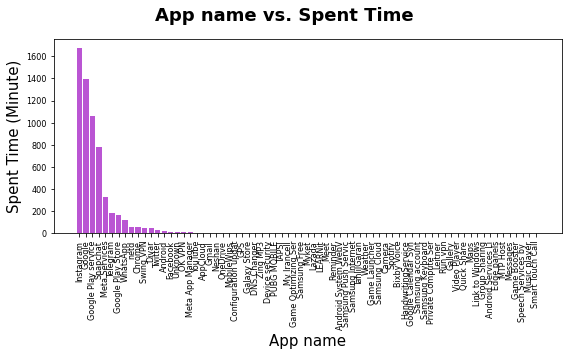

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("App name vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg10.index, app_time_agg10['Time'], color='mediumorchid')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 11

In [119]:
df = pd.read_csv("datasets/Zeinab/PCAPdroid_12_Apr._00_40_39.csv")

In [120]:
df.head()

,IPProto,SrcIP,SrcPort,DstIp,DstPort,UID,App,Proto,Status,Info,BytesSent,BytesRcvd,PktsSent,PktsRcvd,FirstSeen,LastSeen
0,6,10.215.173.1,47460,10.215.173.2,853,1051,netd,TCP,Error,NaN,304,40,5,1,1681223045950,1681223077172
1,17,26.147.158.169,45703,10.10.34.34,443,10041,Google Play Store,QUIC,Closed,NaN,3834,0,3,0,1681223046382,1681223049093
2,6,10.215.173.1,41656,10.10.34.35,443,-1,Unknown,TCP,Error,NaN,60,40,1,1,1681223046386,1681223077813
3,17,10.215.173.1,40888,10.215.173.2,53,10000,Eitaa,DNS,Closed,armita.eitaa.com,62,78,1,1,1681223046399,1681223046461
4,6,10.215.173.1,49620,2.189.58.27,443,10000,Eitaa,HTTPS,Closed,armita.eitaa.com,131390,1380701,986,1173,1681223046471,1681223671714


# Student 12

In [121]:
df12a = pd.read_csv("datasets/Zeinab/Student12_8April_1.csv")
df12b = pd.read_csv("datasets/Zeinab/Student12_8April_2.csv")
df12c = pd.read_csv("datasets/Zeinab/Student12_9April_1.csv")
df12d = pd.read_csv("datasets/Zeinab/Student12_9April_2.csv")
df12e = pd.read_csv("datasets/Zeinab/Student12_9April_3.csv")
df12f = pd.read_csv("datasets/Zeinab/Student12_10April.csv")
df12g = pd.read_csv("datasets/Zeinab/Student12_11April_1.csv")
df12h = pd.read_csv("datasets/Zeinab/Student12_11April_2.csv")
df12i = pd.read_csv("datasets/Zeinab/Student12_12April.csv")
df12j = pd.read_csv("datasets/Zeinab/Student12_13April.csv")
df12k = pd.read_csv("datasets/Zeinab/Student12_14April_1.csv")
df12l = pd.read_csv("datasets/Zeinab/Student12_14April_2.csv")
df12m = pd.read_csv("datasets/Zeinab/Student12_15April.csv")

In [122]:
df12 = pd.concat([df12a,df12b,df12c,df12d,df12e,df12f,df12g,df12h,df12i,df12j,df12k,df12l,df12m], 
                 ignore_index=True).reset_index(drop=True)
df12.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,116,Google Play service,10188,0x01072021,Standard query 0xbee4 A alt8-mtalk.google.com
1,2,0.005429,10.215.173.1,10.215.173.2,DNS,112,Meta Services,10099,0x01072021,Standard query 0xda73 A graph.facebook.com
2,3,0.006134,10.215.173.1,159.138.123.56,TCP,108,SHAREit,10267,0x01072021,40688 > 80 [SYN] Seq=0 Win=65535 Len=0 MSS=9...
3,4,0.004845,10.215.173.1,47.241.35.73,TCP,108,Xiaomi service fram,10146,0x01072021,43842 > 5222 [SYN] Seq=0 Win=65535 Len=0 MSS...
4,5,0.003921,10.215.173.1,10.215.173.2,DNS,108,Mi Video,10145,0x01072021,Standard query 0x00ee A www.youtube.com


In [123]:
len(df12)

1405716

In [124]:
df12 = df12.dropna()
df12.isnull().values.any()

False

In [125]:
df12['App name'].unique()

array(['Google Play service', 'Meta Services', 'SHAREit',
       'Xiaomi service fram', 'Mi Video', 'Google', 'Google Play Store',
       'Unknown', 'Telegram', 'Meta App Manager', 'Phone', 'WhatsApp',
       'Analytics', 'Messages', 'Gmail', 'Android System WebV',
       'LinkedIn', 'Wallpaper Carousel', 'Snapp', 'EYE VPN', 'Instagram',
       'Weather', 'Pinterest', 'Bluetooth', 'Permissions', 'Chrome',
       'Music', 'Xiaomi Account', 'Android', 'Speech Services by ',
       'Gallery', 'Private Compute Ser', 'MTP Host', 'Gboard', 'Meet',
       'YouTube', 'Calendar', 'msa',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275-paypo',
       'System apps updater', 'Duolingo', 'File Manager', 'Maps',
       'Themes', 'My MCI', 'Block Puzzle Guardi', 'Filimo', 'My Irancell',
       'Find device', 'Contacts', 'System service plug', 'Disc

In [126]:
len(df12['App name'].unique())

66

In [127]:
for index, row in df12.iterrows():
    if row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275-paypo':
        df12.at[index, 'App name'] = 'paypo'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df12.at[index, 'App name'] = 'X'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df12.at[index, 'App name'] = 'XX'

In [128]:
df12['Time'] = df12['Time']/60

In [129]:
app_time_agg12 = df12.groupby('App name').agg({'Time':sum}).sort_values(by='Time', ascending=False)
app_time_agg12.head()

,Time
App name,
WhatsApp,2204.535739
Instagram,1117.082034
Google Play service,443.029599
Telegram,434.688139
msa,272.543718


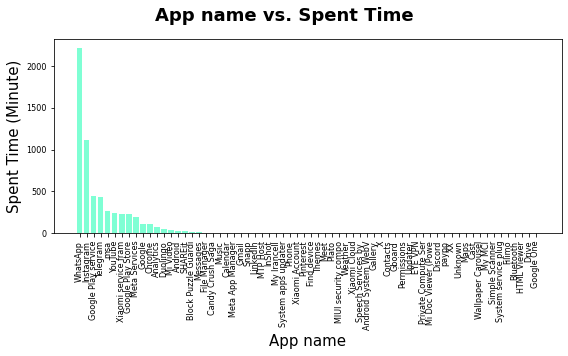

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("App name vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg12.index, app_time_agg12['Time'], color='aquamarine')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 13

In [131]:
df13a = pd.read_csv("datasets/Zeinab/Student13_8April.csv")
df13b = pd.read_csv("datasets/Zeinab/Student13_12April.csv")
df13c = pd.read_csv("datasets/Zeinab/Student13_13April_1.csv")
df13d = pd.read_csv("datasets/Zeinab/Student13_13April_2.csv")
df13e = pd.read_csv("datasets/Zeinab/Student13_14April.csv")
df13f = pd.read_csv("datasets/Zeinab/Student13_15April.csv")
df13g = pd.read_csv("datasets/Zeinab/Student13_16April.csv")
df13h = pd.read_csv("datasets/Zeinab/Student13_17April.csv")

In [132]:
df13 = pd.concat([df13a,df13b,df13c,df13d,df13e,df13f,df13g,df13h], 
                 ignore_index=True).reset_index(drop=True)
df13.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,TCP,112,netd,1051,0x01072021,46656 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.007540,10.215.173.1,10.215.173.2,DNS,104,Bale,10317,0x01072021,Standard query 0x9f11 A ep.bale.tel
2,3,0.003024,10.215.173.1,10.215.173.2,DNS,128,Bale,10317,0x01072021,Standard query 0x4b2c A firebaseremoteconfig.g...
3,4,0.018048,10.215.173.1,10.215.173.2,DNS,116,Google Play service,10193,0x01072021,Standard query 0x59cd A alt7-mtalk.google.com
4,5,0.017467,10.215.173.2,10.215.173.1,DNS,240,Bale,10317,0x01072021,Standard query response 0x4b2c A firebaseremot...


In [133]:
len(df13)

7298724

In [134]:
df13 = df13.dropna()
df13.isnull().values.any()

False

In [135]:
df13['App name'].unique()

array(['netd', 'Bale', 'Google Play service', 'Xiaomi service fram',
       'Unknown', 'Chrome', 'Google Play Store', 'Instagram', 'Telegram',
       'WhatsApp', 'Drive', 'msa', 'Calculator', 'Meta Services',
       'System apps updater', 'Analytics', 'Google', 'Android', 'Phone',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'mobogram', 'Speech Services by ', 'Snapchat', 'Messages',
       'Soroush+', 'Snapp', 'YouTube', 'Weather', 'Pocket FM',
       'Find device', 'Meet', 'Music', 'System launcher', 'Cake', 'Gmail',
       'Gboard', 'Gallery', 'MulticastDNSRespond', 'Mi Video',
       'System service plug', 'Translate', 'Xiaomi Cloud', 'Root',
       'PowerPoint', 'Digikala', 'Meta App Manager', 'Themes',
       'Permissions', 'Skype',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 

In [136]:
len(df13['App name'].unique())

77

In [137]:
for i, row in df13.iterrows():
    if row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df13.at[i, 'App name'] = 'X'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df13.at[i, 'App name'] = 'XX'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df13.at[i, 'App name'] = 'XXX'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df13.at[i, 'App name'] = 'XXXX'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df13.at[i, 'App name'] = 'XXXXX'

In [138]:
df13['Time'] = df13['Time']/60

In [139]:
app_time_agg13 = df13.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg13.head()

,Time
App name,
Instagram,963.184523
WhatsApp,924.618886
netd,806.879348
Telegram,599.198680
Soroush+,481.766125


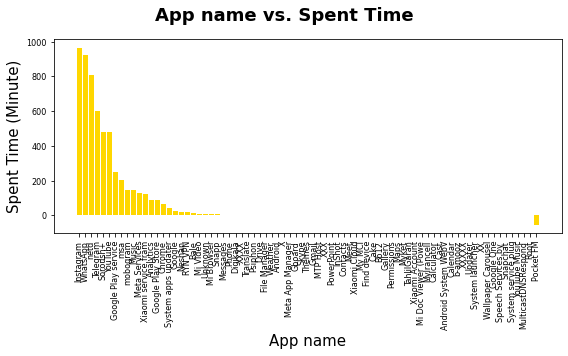

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("App name vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg13.index, app_time_agg13['Time'], color='gold')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 14

In [141]:
df14a = pd.read_csv("datasets/Zeinab/Student14_9April.csv")
df14b = pd.read_csv("datasets/Zeinab/Student14_10April.csv")
df14c = pd.read_csv("datasets/Zeinab/Student14_12April.csv")
df14d = pd.read_csv("datasets/Zeinab/Student14_13April.csv")
df14e = pd.read_csv("datasets/Zeinab/Student14_14April.csv")
df14f = pd.read_csv("datasets/Zeinab/Student14_16April.csv")

In [142]:
df14 = pd.concat([df14a,df14b,df14c,df14d,df14e,df14f], ignore_index=True).reset_index(drop=True)
df14.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,120,SHAREit,10263,0x01072021,Standard query 0xb0bf A gaia-plugin-api.wshare...
1,2,0.038126,10.215.173.2,10.215.173.1,DNS,136,SHAREit,10263,0x01072021,Standard query response 0xb0bf A gaia-plugin-a...
2,3,0.011609,10.215.173.1,10.10.34.35,TCP,108,SHAREit,10263,0x01072021,60582 > 80 [SYN] Seq=0 Win=65535 Len=0 MSS=9...
3,4,0.336820,22.58.203.85,10.215.173.2,TCP,108,netd,1051,0x01072021,40132 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...
4,5,0.010316,22.58.203.85,10.10.34.35,TCP,108,Meta Services,10073,0x01072021,46518 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...


In [143]:
len(df14)

802147

In [144]:
df14.isnull().values.any()

False

In [145]:
df14['App name'].unique()

array(['SHAREit', 'netd', 'Meta Services', 'Google Play service',
       'Swing VPN', 'Telegram', 'Samsung Pass', 'Google Play Store',
       'WhatsApp', 'BolBol Jan', 'GPS', 'Samsung Keyboard', 'Instagram',
       'Google', 'Duo', 'Facebook', 'Snapp', 'Piano Music Tiles 2',
       'Android System WebV', 'Samsung Members', 'Chrome', 'MobileWips',
       'Samsung account', 'Android', 'OneDrive', 'Link to Windows',
       'Samsung Cloud', 'Piano Fire', 'Customisation Servi',
       'CoolVPN Pro', 'Samsung Health', 'Game Launcher',
       'Game Optimizing Ser', 'Bixby Voice', 'Google Play Games',
       'Ahangify', 'Unknown', 'Galaxy Store', 'TahlilGaran',
       'Meta App Manager', 'Samsung Free', 'Spotify', 'Resalat MBanking',
       'Finder', 'Netflix', 'Messages',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277

In [146]:
len(df14['App name'].unique())

67

In [147]:
for i, row in df14.iterrows():
    if row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df14.at[i, 'App name'] = 'X'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df14.at[i, 'App name'] = 'XX'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df14.at[i, 'App name'] = 'XXX'
    elif row['App name'] == 'Cars 2 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df14.at[i, 'App name'] = 'Cars 2'

In [148]:
df14['Time'] = df14['Time']/60

In [149]:
app_time_agg14 = df14.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg14.head()

,Time
App name,
WhatsApp,1195.826453
Instagram,708.364236
Google Play service,498.921429
Google Play Store,452.879055
Google,280.966491


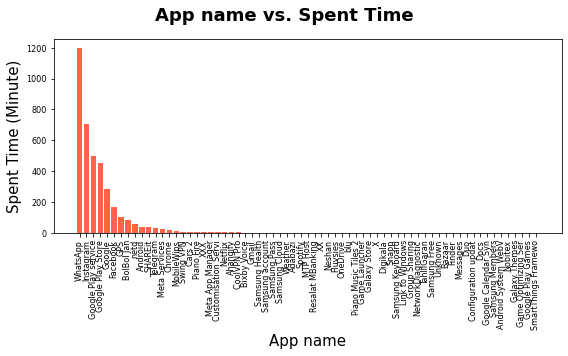

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("App name vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg14.index, app_time_agg14['Time'], color='tomato')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 15

In [151]:
df15a = pd.read_csv("datasets/Zeinab/Student15_8April.csv")
df15b = pd.read_csv("datasets/Zeinab/Student15_10April.csv")
df15c = pd.read_csv("datasets/Zeinab/Student15_11April.csv")
df15d = pd.read_csv("datasets/Zeinab/Student15_13April.csv")
df15e = pd.read_csv("datasets/Zeinab/Student15_15April.csv")

In [152]:
df15 = pd.concat([df15a,df15b,df15c,df15d,df15e], ignore_index=True).reset_index(drop=True)
df15.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,108,WhatsApp,10263,0x01072021,Standard query 0x584b A g.whatsapp.net
1,2,0.003693,10.215.173.1,157.240.20.32,TCP,108,Meta Services,10082,0x01072021,54264 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
2,3,0.002480,10.215.173.1,10.215.173.2,DNS,116,Meta Services,10082,0x01072021,Standard query 0x397d A mqtt-mini.facebook.com
3,4,0.022336,10.215.173.2,10.215.173.1,DNS,124,WhatsApp,10263,0x01072021,Standard query response 0x584b A g.whatsapp.ne...
4,5,0.011039,10.215.173.2,10.215.173.1,DNS,160,Meta Services,10082,0x01072021,Standard query response 0x397d A mqtt-mini.fac...


In [153]:
len(df15)

143398

In [154]:
df15 = df15.dropna()
df15.isnull().values.any()

False

In [155]:
df15['App name'].unique()

array(['WhatsApp', 'Meta Services', 'Instagram', 'Google Play service',
       'Telegram', 'SHAREit',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Samsung Free', 'OneDrive', 'Samsung Push Servic', 'Android',
       'Snapp', 'Facebook', 'Chrome', 'Unknown', 'Google Play Store',
       'Google', 'Google Calendar Syn', 'Gmail', 'Group Sharing',
       'Samsung Cloud', 'SCPM Client', 'Snapchat', 'Picsart', 'MTP Host',
       'Galaxy Themes', 'Samsung account', 'LDOCE', 'Samsung Health',
       'Customization Servi', 'Weather', 'Android System WebV', 'Email',
       'Kahoot!', 'Meta App Manager', 'A1Office - XLS, PPT', 'Digikala',
       'CoolVPN Pro', 'ELSA Speak', 'Hiya Service', 'Game Launcher',
       'My MCI', 'Quick Share',
       'TAPSI - \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357

In [156]:
len(df15['App name'].unique())

54

In [157]:
for i, row in df15.iterrows():
    if row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df15.at[i, 'App name'] = 'X'
    elif row['App name'] == 'TAPSI - \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df15.at[i, 'App name'] = 'TAPSI'


In [158]:
df15['Time'] = df15['Time']/60

In [159]:
app_time_agg15 = df15.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg15.head()

,Time
App name,
Instagram,581.086392
WhatsApp,517.181302
Google Play service,128.549580
SHAREit,68.926261
Meta Services,64.087585


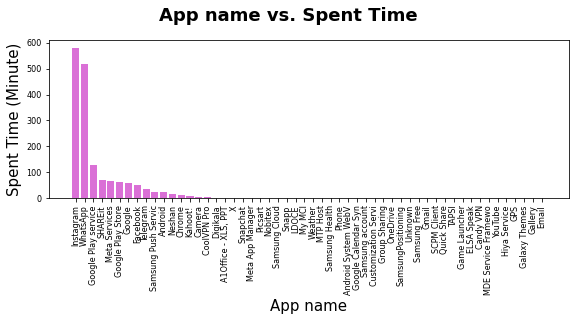

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(8.1,4.5)
fig.suptitle("App name vs. Spent Time", fontsize=18, fontweight='bold')

ax.bar(app_time_agg15.index, app_time_agg15['Time'], color='orchid')

ax.set_xlabel("App name", fontsize=15)
ax.set_ylabel("Spent Time (Minute)", fontsize=15)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Student 16

In [161]:
df16a = pd.read_csv("datasets/Zeinab/Student16_8April.csv")
df16b = pd.read_csv("datasets/Zeinab/Student16_9April.csv")
df16c = pd.read_csv("datasets/Zeinab/Student16_10April.csv")
df16d = pd.read_csv("datasets/Zeinab/Student16_11April.csv")
df16e = pd.read_csv("datasets/Zeinab/Student16_12April.csv")
df16f = pd.read_csv("datasets/Zeinab/Student16_13April.csv")
df16g = pd.read_csv("datasets/Zeinab/Student16_14April.csv")
df16h = pd.read_csv("datasets/Zeinab/Student16_15April.csv")

In [162]:
df16 = pd.concat([df16a,df16b,df16c,df16d,df16e,df16f,df16g,df16h],
                 ignore_index=True).reset_index(drop=True)
df16.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,22.161.9.47,10.10.34.34,TCP,108,Instagram,10316,0x01072021,57399 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.217217,10.215.173.1,142.250.74.74,TCP,108,Google Backup Trans,10008,0x01072021,44184 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
2,3,0.203090,10.215.173.1,172.217.21.165,TCP,108,Gmail,10070,0x01072021,34140 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
3,4,0.005939,22.161.9.47,10.10.34.34,TCP,108,Instagram,10316,0x01072021,54445 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
4,5,0.111558,22.161.9.47,157.240.27.18,TCP,108,BeautyCam,10315,0x01072021,41434 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...


In [163]:
len(df16)

856624

In [164]:
df16 = df16.dropna()
df16.isnull().values.any()

False

In [165]:
df16['App name'].unique()

array(['Instagram', 'Google Backup Trans', 'Gmail', 'BeautyCam', 'Root',
       'Telegram', 'Google Play Store', 'Fastdic', 'YouTube', 'Unknown',
       'WhatsApp\\357\\277\\275\\357\\277\\275Business', 'Evernote',
       'Setup Wizard', 'Divar', 'Google Calendar Syn', 'Snapp', 'Bale',
       'Chrome', 'Google', 'Weather Service', 'GPS', 'Drive', 'Android',
       'Maps', 'Cell Broadcast', 'NetVpn', 'Android System WebV',
       'My Irancell', 'Docs', 'Slides', 'Sheets', 'Ger-Eng Dictionary '],
      dtype=object)

In [166]:
len(df16['App name'].unique())

32

In [167]:
for i, row in df16.iterrows():
    if row['App name'] == 'WhatsApp\\357\\277\\275\\357\\277\\275Business':
        df16.at[i, 'App name'] = 'WhatsApp'

In [168]:
df16['Time'] = df16['Time']/60

In [169]:
app_time_agg16 = df16.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg16.head()

,Time
App name,
Instagram,1268.103583
Root,464.522069
Telegram,318.935435
Google Play Store,267.509394
WhatsApp,205.690985


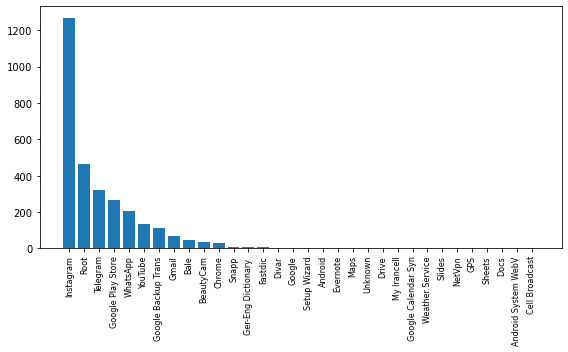

In [170]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
# fig.suptitle("")

ax.bar(app_time_agg16.index, app_time_agg16['Time'])

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

# Student 17

In [171]:
df17a = pd.read_csv("datasets/Zeinab/Student17_9April.csv")
df17b = pd.read_csv("datasets/Zeinab/Student17_10April.csv")
df17c = pd.read_csv("datasets/Zeinab/Student17_12April.csv")
df17d = pd.read_csv("datasets/Zeinab/Student17_15April.csv")
df17e = pd.read_csv("datasets/Zeinab/Student17_17April_1.csv")
df17f = pd.read_csv("datasets/Zeinab/Student17_17April_2.csv")

In [172]:
df17 = pd.concat([df17a,df17b,df17c,df17d,df17e,df17f],ignore_index=True).reset_index(drop=True)
df17.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.10.34.36,TCP,108,WhatsApp,10297,0x01072021,39102 > 5222 [SYN] Seq=0 Win=65535 Len=0 MSS...
1,2,0.004995,10.215.173.1,10.215.173.2,DNS,108,Google Play service,10221,0x01072021,Standard query 0x4348 A mtalk.google.com
2,3,0.029386,10.215.173.2,10.215.173.1,DNS,156,Google Play service,10221,0x01072021,Standard query response 0x4348 A mtalk.google....
3,4,0.003644,10.215.173.1,142.250.150.188,TCP,108,Google Play service,10221,0x01072021,51086 > 5228 [SYN] Seq=0 Win=65535 Len=0 MSS...
4,5,0.162652,142.250.150.188,10.215.173.1,TCP,96,Google Play service,10221,0x01072021,"5228 > 51086 [SYN, ACK] Seq=0 Ack=1 Win=1536..."


In [173]:
len(df17)

70215

In [174]:
df17 = df17.dropna()
df17.isnull().values.any()

False

In [175]:
df17['App name'].unique()

array(['WhatsApp', 'Google Play service', 'Telegram', 'netd',
       'Samsung account', 'Voice Recorder', 'Google Play Store',
       'Unknown', 'Android', 'Google', 'Link to Windows Ser',
       'Meta App Manager', 'Hiya Service',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Bixby Voice', 'Chrome', 'Samsung Keyboard', 'Group Sharing',
       'Samsung Notes', 'Messages', 'biubiuvpn', 'Translate',
       'Configuration updat', 'Camera', 'Samsung Cloud', 'Gmail',
       'Media and devices', 'Barcode Scanner', 'Samsung Internet',
       'Samsung Free', 'Maps', 'Instagram', 'Galaxy Store',
       'Customisation Servi', 'imo', 'Meta Services'], dtype=object)

In [176]:
len(df17['App name'].unique())

36

In [177]:
for i, row in df17.iterrows():
    if row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df17.at[i, 'App name'] = 'X'

In [178]:
df17['Time'] = df17['Time']/60

In [179]:
app_time_agg17 = df17.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg17.head()

,Time
App name,
Google Play service,107.405736
Google Play Store,83.761086
WhatsApp,57.194647
Telegram,31.382024
Chrome,15.554131


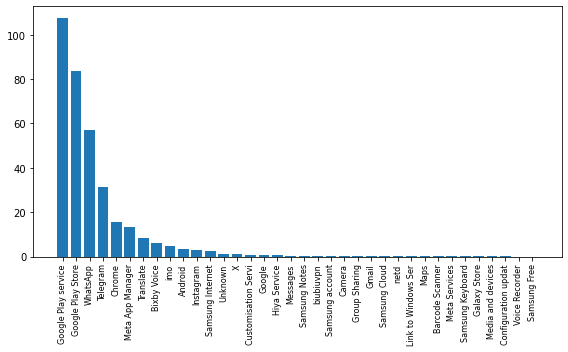

In [180]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.bar(app_time_agg17.index, app_time_agg17['Time'])

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()


# Student 18

In [181]:
df18a = pd.read_csv("datasets/Zeinab/Student18_10April.csv")
df18b = pd.read_csv("datasets/Zeinab/Student18_11April.csv")
df18c = pd.read_csv("datasets/Zeinab/Student18_12April.csv")
df18d = pd.read_csv("datasets/Zeinab/Student18_13April.csv")
df18e = pd.read_csv("datasets/Zeinab/Student18_14April.csv")
df18f = pd.read_csv("datasets/Zeinab/Student18_15April.csv")
df18g = pd.read_csv("datasets/Zeinab/Student18_16April.csv")

In [182]:
df18 = pd.concat([df18a,df18b,df18c,df18d,df18e,df18f,df18g],ignore_index=True).reset_index(drop=True)
df18.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,149.154.167.92,TCP,108,Telegram,10303,0x01072021,41190 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.002037,10.215.173.1,149.154.167.92,TCP,108,Telegram,10303,0x01072021,41192 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
2,3,0.004101,10.215.173.1,10.215.173.2,DNS,116,Google Play service,10210,0x01072021,Standard query 0x0803 A alt2-mtalk.google.com
3,4,0.060392,10.215.173.2,10.215.173.1,DNS,164,Google Play service,10210,0x01072021,Standard query response 0x0803 A alt2-mtalk.go...
4,5,0.061674,10.215.173.1,142.251.9.188,TCP,108,Google Play service,10210,0x01072021,43308 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...


In [183]:
len(df18)

106053

In [184]:
df18.isnull().values.any()

False

In [185]:
df18['App name'].unique()

array(['Telegram', 'Google Play service', 'Google Play Store',
       'Xiaomi service fram', 'YouTube', 'netd', 'Package installer',
       'Analytics', 'WhatsApp', 'Instagram', 'Bazaar', 'Meta Services',
       'Contacts', 'Messages', 'MIUI security compo', 'Permissions',
       'Android', 'Chrome', 'Unknown', 'Google'], dtype=object)

In [186]:
len(df18['App name'].unique())

20

In [187]:
df18['Time'] = df18['Time']/60

In [188]:
app_time_agg18 = df18.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg18.head()

,Time
App name,
Telegram,3.881946
Bazaar,2.690877
Package installer,2.384518
Google Play Store,1.898556
Meta Services,1.169977


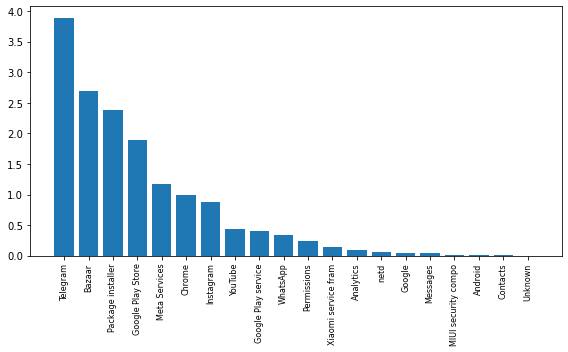

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.bar(app_time_agg18.index, app_time_agg18['Time'])

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()


# Student 19

In [190]:
df19a = pd.read_csv("datasets/Zeinab/Student19_7April.csv")
df19b = pd.read_csv("datasets/Zeinab/Student19_8April.csv")
df19c = pd.read_csv("datasets/Zeinab/Student19_9April.csv")
df19d = pd.read_csv("datasets/Zeinab/Student19_10April.csv")
df19e = pd.read_csv("datasets/Zeinab/Student19_11April.csv")
df19f = pd.read_csv("datasets/Zeinab/Student19_12April.csv")

In [191]:
df19 = pd.concat([df19a,df19b,df19c,df19d,df19e,df19f], ignore_index=True).reset_index(drop=True)
df19.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,108,Instagram,10280,0x01072021,Standard query 0xa655 AAAA i.instagram.com
1,2,0.003124,10.215.173.1,10.215.173.2,DNS,108,Instagram,10280,0x01072021,Standard query 0x79d2 A i.instagram.com
2,3,0.002778,10.215.173.1,10.215.173.2,DNS,116,Google Play service,10182,0x01072021,Standard query 0xfdd8 A alt7-mtalk.google.com
3,4,0.002313,10.215.173.1,10.215.173.2,DNS,112,Instagram,10280,0x01072021,Standard query 0x9332 A graph.instagram.com
4,5,0.002679,10.215.173.1,10.10.34.34,TCP,108,Instagram,10280,0x01072021,35904 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...


In [192]:
len(df19)

200909

In [193]:
df19 = df19.dropna()
df19.isnull().values.any()

False

In [194]:
df19['App name'].unique()

array(['Instagram', 'Google Play service', 'Eitaa', 'Xiaomi service fram',
       'netd', 'Analytics', 'Telegram', 'Meta Services',
       'Google Play Store', 'WhatsApp', 'Chrome', 'SHAREit', 'Music',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Facebook', 'Soroush+', 'Android System WebV', 'Unknown',
       'Messages', 'Mi Video', 'File Manager', 'Google', 'GPS', 'Android',
       'Divar', 'Snapp', 'Permissions', 'Cleaner', 'Package installer',
       'MIUI security compo',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275-paypo',
       'System apps updater', 'GetApps', 'Xiaomi Account', 'HT

In [195]:
len(df19['App name'].unique())

38

In [196]:
for i, row in df19.iterrows():
    if row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275-paypo':
        df19.at[i, 'App name'] = 'paypo'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df19.at[i, 'App name'] = 'X'

In [197]:
df19['Time'] = df19['Time']/60

In [198]:
app_time_agg19 = df19.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg19.head()

,Time
App name,
Telegram,11.727344
Chrome,10.998022
WhatsApp,6.987048
Music,6.709812
Google,4.047316


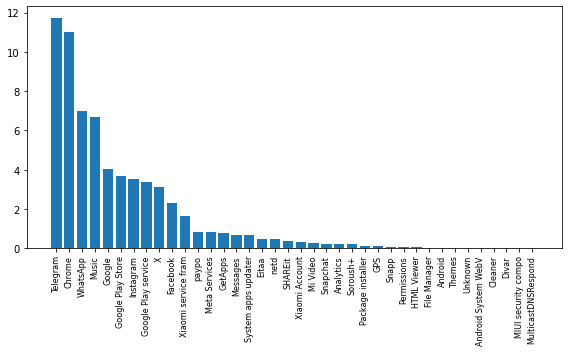

In [199]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.bar(app_time_agg19.index, app_time_agg19['Time'])

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Student 20

In [200]:
df20a = pd.read_csv("datasets/Zeinab/Student20_8April.csv")
df20b = pd.read_csv("datasets/Zeinab/Student20_10April_1.csv")
df20c = pd.read_csv("datasets/Zeinab/Student20_10April_2.csv")
df20d = pd.read_csv("datasets/Zeinab/Student20_15April.csv")
df20e = pd.read_csv("datasets/Zeinab/Student20_17April.csv")

In [201]:
df20 = pd.concat([df20a,df20b,df20c,df20d,df20e], ignore_index=True).reset_index(drop=True)
df20.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,116,Meta Services,10066,0x01072021,Standard query 0x0594 A mqtt-mini.facebook.com
1,2,0.007197,10.215.173.1,10.215.173.2,DNS,128,Google Play service,10197,0x01072021,Standard query 0x5790 A googleonebackup-pa.goo...
2,3,0.034805,10.215.173.1,10.215.173.2,DNS,116,Music Player,10246,0x01072021,Standard query 0xbdbb A litterpenguin.umeng.com
3,4,0.002867,10.215.173.2,10.215.173.1,DNS,132,Meta Services,10066,0x01072021,Standard query response 0x0594 A mqtt-mini.fac...
4,5,0.000653,10.215.173.2,10.215.173.1,DNS,240,Google Play service,10197,0x01072021,Standard query response 0x5790 A googleoneback...


In [202]:
len(df20)

324160

In [203]:
df20 = df20.dropna()
df20.isnull().values.any()

False

In [204]:
df20['App name'].unique()

array(['Meta Services', 'Google Play service', 'Music Player', 'Chrome',
       'RYN VPN', 'netd', 'Telegram', 'Lantern', 'Google Play Store',
       'Instagram', 'SHAREit', 'Rubika', 'Game Launcher', 'GPS', 'Google',
       'Unknown', 'Eitaa', 'WhatsApp', 'AppCloud', 'BadeSaba',
       'Samsung Internet', 'Snapp', 'Bale', 'Gmail', 'Android',
       'OneDrive', 'Meta App Manager', 'Android System WebV', 'Divar',
       'Translate', 'Messages', 'Drive', 'Quick Share',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'AVC: Antivirus & Vi', 'TahlilGaran', 'LDOCE', 'Bixby Voice',
       'biubiuvpn', 'Samsung Keyboard', 'Samsung Notes',
       'Configuration updat', 'Camera', 'Samsung account',
       'Samsung Cloud', 'Hiya Service', 'Group Sharing',
       'Media and device

In [205]:
len(df20['App name'].unique())

52

In [206]:
for i, row in df20.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df20.at[i, 'App name'] = 'X'
    elif row['App name'] == '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df20.at[i, 'App name'] = 'XX'

In [207]:
df20['Time'] = df20['Time']/60

In [208]:
app_time_agg20 = df20.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg20.head()

,Time
App name,
Lantern,397.087206
Google Play Store,87.273360
Telegram,86.924284
Google Play service,73.393553
WhatsApp,51.424377


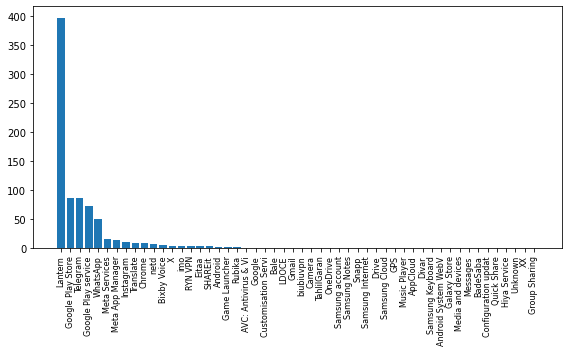

In [209]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.bar(app_time_agg20.index, app_time_agg20['Time'])

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()


In [210]:
plt.close('all')

# Student 21

In [211]:
df21a = pd.read_csv("datasets/Zeinab/Student21_8April.csv")
df21b = pd.read_csv("datasets/Zeinab/Student21_9April.csv")
df21c = pd.read_csv("datasets/Zeinab/Student21_10April_1.csv")
df21d = pd.read_csv("datasets/Zeinab/Student21_10April_2.csv")
df21e = pd.read_csv("datasets/Zeinab/Student21_11April.csv")
df21f = pd.read_csv("datasets/Zeinab/Student21_12April.csv")
df21g = pd.read_csv("datasets/Zeinab/Student21_13April.csv")
df21h = pd.read_csv("datasets/Zeinab/Student21_15April.csv")

In [212]:
df21 = pd.concat([df21a,df21b,df21c,df21d,df21e,df21f,df21g,df21h], 
                 ignore_index=True).reset_index(drop=True)
df21.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0x79a8 A 3.pool.ntp.org
1,2,0.020005,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0xae93 A 0.pool.ntp.org
2,3,0.025377,10.215.173.1,10.215.173.2,DNS,108,Eitaa,11623,0x01072021,Standard query 0x6f4f A hasan.eitaa.ir
3,4,0.007062,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0xd0b1 A 2.pool.ntp.org
4,5,0.005955,10.215.173.1,10.215.173.2,DNS,108,GPS,1021,0x01072021,Standard query 0x854f A 1.pool.ntp.org


In [213]:
len(df21)

1853593

In [214]:
df21 = df21.dropna()
df21.isnull().values.any()

False

In [215]:
df21['App name'].unique()

array(['GPS', 'Eitaa', 'Bale', 'netd', 'Unknown', 'Google Play Store',
       'Instagram', 'Telegram', 'blu', 'Google Play service', 'Lantern',
       'Meta Services', 'Weather', 'Game Launcher', 'SHAREit', 'Android',
       'Samsung Health', 'Android System WebV', 'SamsungPositioning',
       'Google',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Samsung Internet', 'Samsung Free', 'Speech to Text', 'Snapp',
       'Speech Services by ', 'Word', 'Samsung Keyboard', 'Photos',
       '\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275',
       'Samsung account', 'Chrome', 'Customization Servi', 'My MCI',
       'Group Sharing', 'Link to Windows', 'WhatsApp', 'Filmnet',
       'Configuration updat', 'Samsung Cloud', 'Samsung Notes',
       'Meta App Manager', 'Photo Editor', 'TahlilGaran',
       '

In [216]:
len(df21['App name'].unique())

89

In [217]:
for i, row in df21.iterrows():
    if row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'X'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 Windo':
        df21.at[i, 'App name'] = 'Windows'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 Goog':
        df21.at[i, 'App name'] = 'Google'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 Googl':
        df21.at[i, 'App name'] = 'Google'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXXXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXXXXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXXXXXXXX'
    elif row['App name']=='\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275 \\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275\\357\\277\\275':
        df21.at[i, 'App name'] = 'XXXXXXXXXX'


In [218]:
df21['Time'] = df21['Time']/60

In [219]:
app_time_agg21 = df21.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg21.head()

,Time
App name,
Lantern,1181.532560
Instagram,544.798413
Google,300.798951
Google Play service,250.506795
Meta Services,243.215379


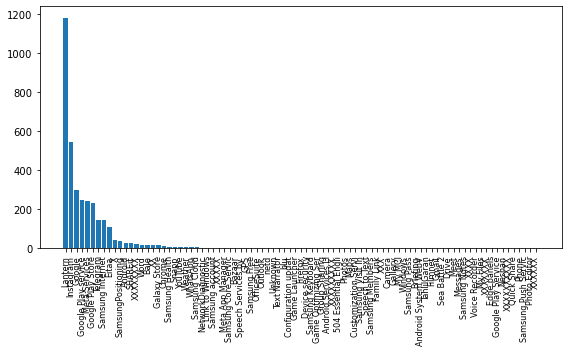

In [220]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.bar(app_time_agg21.index, app_time_agg21['Time'])

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()


# Student 22

In [221]:
df22a = pd.read_csv("datasets/Zeinab/Student22_8April.csv")
df22b = pd.read_csv("datasets/Zeinab/Student22_9April.csv")
df22c = pd.read_csv("datasets/Zeinab/Student22_10April.csv")
df22d = pd.read_csv("datasets/Zeinab/Student22_11April.csv")
df22e = pd.read_csv("datasets/Zeinab/Student22_14April.csv")

In [222]:
df22 = pd.concat([df22a,df22b,df22c,df22d,df22e], ignore_index=True).reset_index(drop=True)
df22.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,10.10.34.34,UDP,1324,Google Play Store,10223,0x01072021,33113 > 443 Len=1250
1,2,0.016675,10.215.173.1,10.10.34.34,TCP,108,Google Play Store,10223,0x01072021,57788 > 443 [SYN] Seq=0 Win=39840 Len=0 MSS=...
2,3,0.022733,10.215.173.1,10.215.173.2,DNS,108,Google Play service,10221,0x01072021,Standard query 0x2461 A mtalk.google.com
3,4,0.056196,10.215.173.1,10.10.34.34,UDP,1308,Instagram,10277,0x01072021,40177 > 443 Len=1232
4,5,0.006869,10.215.173.1,10.215.173.2,DNS,108,Instagram,10277,0x01072021,Standard query 0xe6c1 A i.instagram.com


In [223]:
len(df22)

626514

In [224]:
df22 = df22.dropna()
df22.isnull().values.any()

False

In [225]:
df22['App name'].unique()

array(['Google Play Store', 'Google Play service', 'Instagram',
       'Meta Services', 'Meta App Manager', 'netd', 'Telegram',
       'Samsung Internet', 'Pinterest', 'Google', 'Weather',
       'Samsung Cloud', 'Android', 'Messages', 'Meet', 'OneDrive',
       'Beauty Cam', 'Android System WebV', 'Unknown', 'Lightroom',
       'Samsung Keyboard', 'Smart Touch Call', 'Gallery', 'Mx Tunnel',
       'Photo Editor', 'Snapp', 'Samsung Free', 'Google Calendar Syn',
       'Customization Servi', 'Plants vs. Zombies ', 'Game Booster',
       'Camera', 'Samsung Notes', 'Phone', 'X VPN', 'Quick Share',
       'Link to Windows', 'Configuration updat', 'Galaxy Store', 'Gmail',
       'Photos', 'Samsung Push Servic', 'Game Optimizing Ser', 'YouTube',
       'YouTube Music', 'Game Launcher', 'Shenzo VPN', 'Video Player',
       'Samsung account', 'Samsung Pass', 'Samsung Checkout',
       'MobileWips', 'TahlilGaran', 'Speech Services by ', 'InShot',
       'GPS'], dtype=object)

In [226]:
len(df22['App name'].unique())

56

In [227]:
df22['Time'] = df22['Time']/60

In [228]:
app_time_agg22 = df22.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
app_time_agg22.head()

,Time
App name,
Instagram,737.384900
Telegram,492.130842
Google Play service,429.913182
Meta Services,323.700550
Google Play Store,179.572751


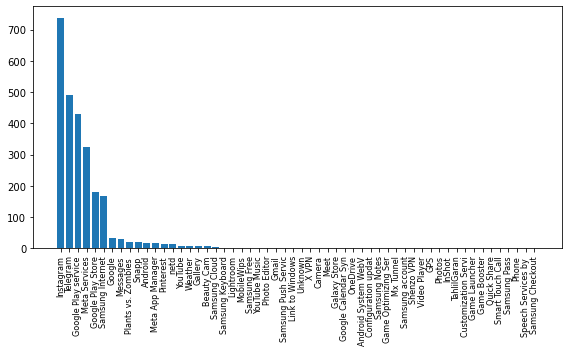

In [229]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)

ax.bar(app_time_agg22.index, app_time_agg22['Time'])

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# All the Students

In [230]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df12,df13,df14,df15,df16,
               df17,df18,df19,df20,df21,df22], ignore_index=True).reset_index(drop=True)
df.head()

,No.,Time,Source,Destination,Protocol,Length,App name,UID,Magic,Info
0,1,0.000000,10.215.173.1,172.217.21.163,TCP,108,Unknown,-1.0,0x01072021,33190 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=...
1,2,0.000181,10.215.173.1,10.215.173.2,DNS,116,Google Play service,10180.0,0x01072021,Standard query 0x7ede A alt1-mtalk.google.com
2,3,0.000468,10.215.173.1,10.215.173.2,DNS,112,Google Play Store,10169.0,0x01072021,Standard query 0xd26b A www.googleapis.com
3,4,0.000964,10.215.173.1,47.241.21.126,TCP,108,Xiaomi service fram,10099.0,0x01072021,36772 > 5222 [SYN] Seq=0 Win=65535 Len=0 MSS...
4,5,0.000022,10.215.173.2,10.215.173.1,DNS,164,Google Play service,10180.0,0x01072021,Standard query response 0x7ede A alt1-mtalk.go...


In [231]:
len(df)

22869855

In [232]:
# df = df.dropna()
df.isnull().values.any()

False

In [233]:
len(df['App name'].unique())

296

In [234]:
app_time_agg = df.groupby('App name').agg({'Time':sum}).sort_values(by='Time',ascending=False)
# table = app_time_agg.head(20)
# dfi.export(table, "app_time_agg.png")
app_time_agg.head(20)

,Time
App name,
Instagram,9676.758707
WhatsApp,5624.028766
Google Play service,5186.153900
Telegram,5082.778435
Google,4405.837891
Google Play Store,2729.959344
YouTube,2597.952032
netd,2401.794334
Meta Services,1768.699063


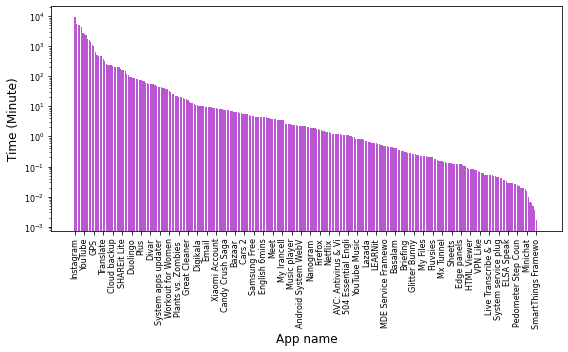

In [235]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
# fig.suptitle("Activation Time of the Apps \n (log-scaled)", fontsize=16, fontweight='bold')

ax.bar(app_time_agg.index, app_time_agg['Time'], color='mediumorchid')

ax.set_xlabel("App name", fontsize=12)
ax.set_ylabel("Time (Minute)", fontsize=12)
ax.set_xticks(app_time_agg.index[::6])
ax.set_xticklabels(app_time_agg.index[::6])
ax.set_yscale('log')

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [236]:
plt.close('all')

In [237]:
# 8 April
df1 = pd.concat([df1a,df2a,df3a,df3b,df3c,df4a,df5a,df6a,df7a,df7b,df7c,df7d,df7e,
                 df9d,df9e,df9f,df12a,df12b,df13a,df15a,df16a,df19b,
                 df20a,df21a,df22a], ignore_index=True).reset_index(drop=True)

# 9 April
df2 = pd.concat([df1b,df3d,df3e,df4b,df5b,df6b,df7f,df7g,df8a,df12c,df12d,df12e,
                df14a,df16b,df17a,df19c,df21b,df22b], ignore_index=True).reset_index(drop=True)

# 10 April
df3 = pd.concat([df2b,df3f,df3g,df3h,df3i,df4c,df5c,df6c,df7h,df8b,df8c,df8d,df8e,df8f,df8g,
                df10a,df12f,df14b,df15b,df16c,df17b,df18a,df19d,df20b,df20c,df21c,df21d,
                df22c], ignore_index=True).reset_index(drop=True)

# 11 April
df4 = pd.concat([df2c,df3j,df4d,df5d,df6d,df6e,df7i,df8h,df9g,df10b,df12g,df12h,
                df15c,df16d,df18b,df19e,df21e,df22d], ignore_index=True).reset_index(drop=True)

# 12 April
df5 = pd.concat([df1c,df2d,df3l,df3m,df3n,df4e,df5e,df6f,df7j,df8i,df8j,df8k,
                df9h,df10c,df12i,df13b,df14c,df16e,df17c,df18c,df19f,df21f], 
                ignore_index=True).reset_index(drop=True)

# 13 April
df6 = pd.concat([df2e,df3o,df4f,df5f,df6g,df7k,df8l,df8m,df8n,df8o,df8p,df8q,df12j,df13c,df13d,
                df14d,df15d,df16f,df18d,df21g], ignore_index=True).reset_index(drop=True)

# 14 April
df7 = pd.concat([df3p,df4g,df5g,df6h,df7l,df8r,df10e,df12k,df12l,df13e,df14e,df16g,df18e,df22e], 
                ignore_index=True).reset_index(drop=True)

# 15 April 
df8 = pd.concat([df1d,df1e,df3q,df3r,df3s,df4h,df5h,df6i,
                df7m,df8s,df8t,df8u,df8v,df8w,df8x,df8y,df9i,df10f,df12m,df13f,df15e,
                df16h,df17d,df18f,df20d,df21h], 
                ignore_index=True).reset_index(drop=True)



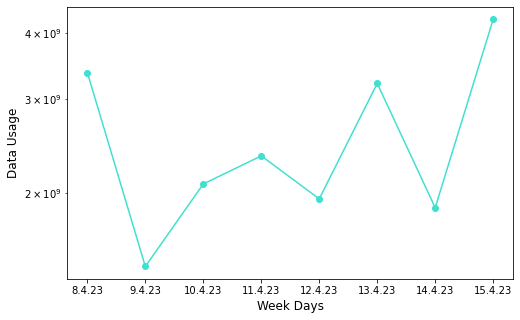

In [238]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
# fig.suptitle("Daily Network Traffic Data Usage", fontsize=16, fontweight='bold')

# ax.plot(dfa['Time'].sample(n=1000, random_state=0), dfa['Length'].sample(n=1000, random_state=0))
date = ['8.4.23','9.4.23','10.4.23','11.4.23','12.4.23','13.4.23','14.4.23','15.4.23']
length = [df1['Length'].sum(), df2['Length'].sum(), df3['Length'].sum(), df4['Length'].sum(),
         df5['Length'].sum(), df6['Length'].sum(), df7['Length'].sum(), df8['Length'].sum()]

ax.plot(date[:8], length, marker='o', color='turquoise')

# ax.set_xticks(dfa['Time'][::5])
# ax.set_xticklabels(dfa['Time'][::5])
ax.set_yscale('log')
ax.set_xlabel("Week Days", fontsize=12)
ax.set_ylabel("Data Usage", fontsize=12)

# plt.xticks(dfa['Time'][::5], rotation=90)

plt.show()

In [239]:
plt.close('all')

In [240]:
df_num = pd.read_csv("datasets/Zeinab/number of apps.csv")

In [241]:
df_num.head()

,Student ID,Number of Apps
0,1,46
1,2,42
2,3,54
3,4,57
4,5,35


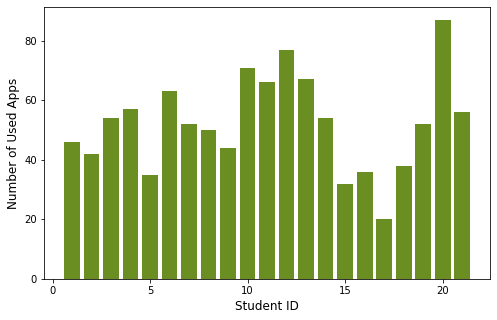

In [242]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
# fig.suptitle("Number of Applications Used by each Student", fontsize=16, fontweight='bold')

ax.bar(df_num['Student ID'],df_num['Number of Apps'], color='olivedrab')

ax.set_xlabel("Student ID", fontsize=12)
ax.set_ylabel("Number of Used Apps", fontsize=12)

plt.show()

In [243]:
plt.close('all')

In [244]:
df['category'] = 0

In [245]:
df['App name'].unique()

array(['Unknown', 'Google Play service', 'Google Play Store',
       'Xiaomi service fram', 'Telegram', 'Analytics', 'YouTube',
       'BolBol Jan', 'MX Player', 'Phone', 'Bale', 'msa', 'Weather',
       'Android', 'PDF Creator', 'Instagram', 'Basalam',
       'Facebook Services', 'Chrome', 'WhatsApp', 'Find device', 'Eitaa',
       'MyIrancell', 'Google', 'Abadis Dic', 'Divar', 'Snapp',
       'Facebook App Manage', 'Notes', 'Messages', 'TAPSI', 'Maps',
       'Updater', 'SHAREit', 'Contacts', 'X', 'Snapchat', 'File Manager',
       'GPS', 'Rubika', 'Connect', 'WPS Office', 'Fastdic', 'Cleaner',
       'Gboard', 'Wallpaper Carousel', 'Meta Services', 'netd', 'Twitter',
       'Meta App Manager', 'Game Launcher', 'Facebook', 'Likee',
       'Digikala', 'Samsung Keyboard', 'Office', 'Link to Windows',
       'Galaxy Store', 'Gmail', 'Pinterest', 'Game Optimizing Ser',
       'Quick Share', 'Camera', 'Customization Servi', 'Samsung Cloud',
       'MiniFox VPN', 'Gallery', 'Bazaar', 'Pics

In [246]:
# for i, row in df.iterrows():
#     if df['App name'] == 'Unknown':
#         df['Category'] = 'Unknown'
#     elif df['App name'] == 

In [247]:
apps_owners = pd.read_csv("datasets/Zeinab/apps owners.csv")

In [248]:
# apps_owners.head()

/tmp/ipykernel_228144/3536740425.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(ylim=[0,20])


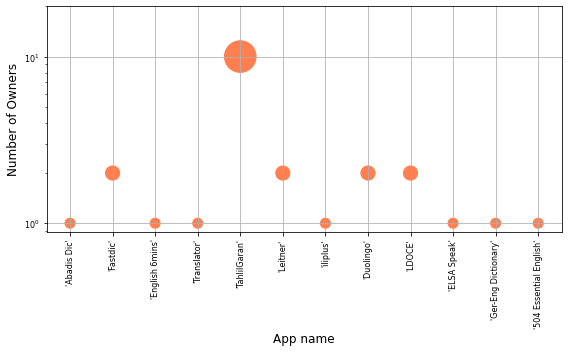

In [249]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
# fig.suptitle("English Learning Assistant Apps Used by the Students", fontweight='bold', fontsize=15)

ax.scatter(apps_owners['App name'], apps_owners['Number of Owners'], 
           s=apps_owners['Number of Owners']*100, color='coral')

ax.set_xlabel('App name', fontsize=12)
ax.set_ylabel('Number of Owners', fontsize=12)
# ax.set(ylim=[0,20])

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.yscale('log')
plt.tight_layout()
plt.grid()
ax.set(ylim=[0,20])
plt.show()

In [250]:
plt.close('all')